# Taryn Michael
# Advanced Machine Learning
# Assignment 3


## **Iris Dataset**

The Iris dataset gives the details of the length and breadth of the three flowers: Setosa, Versicolor, Virginica.

In [16]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import warnings
import pymc3
warnings.filterwarnings("ignore")
# show plots inline
%matplotlib inline


In [17]:
Iris_data = files.upload()

Saving Iris.csv to Iris.csv


In [20]:
Iris_data = pd.read_csv('Iris.csv')
Iris_data = Iris_data.drop('Id', axis=1) # get rid of the Id column - don't need it
Iris_data.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
138,6.0,3.0,4.8,1.8,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
49,5.0,3.3,1.4,0.2,Iris-setosa
45,4.8,3.0,1.4,0.3,Iris-setosa
92,5.8,2.6,4.0,1.2,Iris-versicolor


# Exploratory Data Analysis

In [21]:
Iris_data.shape

(150, 5)

We observe from this above line that our dataset has 150 rows and 5 columns

In [24]:
Iris_data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [25]:
# Further inspecting the dataframe
def inspect_data(data):
    return pd.DataFrame({"Data Type":data.dtypes,"No of Levels":data.apply(lambda x: x.nunique(),axis=0), "Levels":data.apply(lambda x: str(x.unique()),axis=0)})
inspect_data(Iris_data)

,Data Type,No of Levels,Levels
SepalLengthCm,float64,35,[5.1 4.9 4.7 4.6 5. 5.4 4.4 4.8 4.3 5.8 5.7 5...
SepalWidthCm,float64,23,[3.5 3. 3.2 3.1 3.6 3.9 3.4 2.9 3.7 4. 4.4 3...
PetalLengthCm,float64,43,[1.4 1.3 1.5 1.7 1.6 1.1 1.2 1. 1.9 4.7 4.5 4...
PetalWidthCm,float64,22,[0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1. 1...
Species,object,3,['Iris-setosa' 'Iris-versicolor' 'Iris-virgini...


In [26]:
Iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


We see all the columns of our data set are free from null values.

Four of them are numeric while one is a categorical column.

This can also be observed by the dtypes function below:

In [27]:
Iris_data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

#### Statistical Insights into our data

Store the independent and dependent variable in the X and y variables

In [30]:
X = Iris_data.iloc[:,0:4]
y = Iris_data.iloc[:,-1]

In [31]:
y.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

The classes are extremely well balanced and thus no smoothing (class balancing) algorithms are required.

In [32]:
Iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We can however, see that the data itself is unbalanced, as some of the features contain wider ranges of values than others. These features will dominate the dataset. Thus, scaling is needed.

#### Checking for duplicate values

In [33]:
Iris_data[Iris_data.duplicated()]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


There are 3 duplicates in our dataset but removing them might break the balance of our dataset as we see that our dataset is extremely well balanced. Thus we leave the duplicate values as they are.


#### Visualizing relationships between variables

Let us compare the sepal length and sepal width columns on the basis of species type

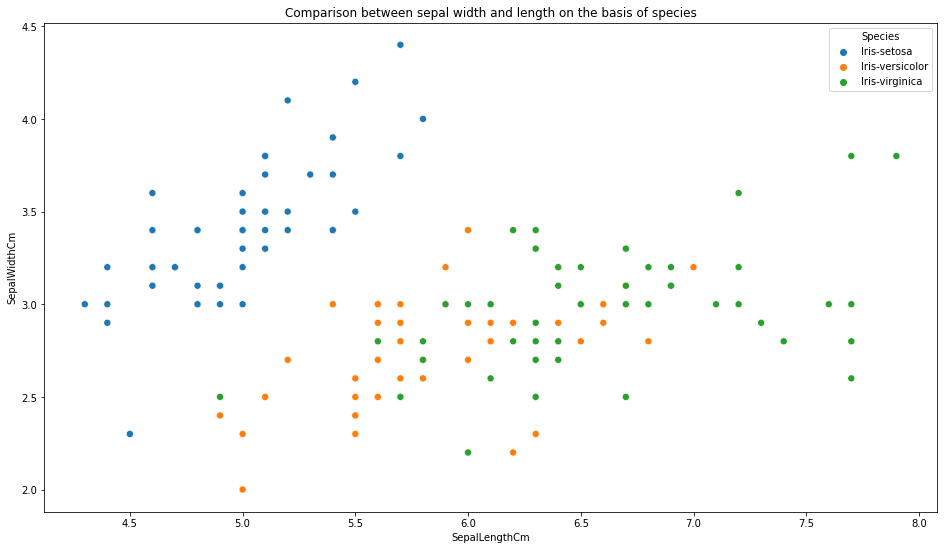

In [37]:
plt.figure(figsize=(16,9))
plt.title('Comparison between sepal width and length on the basis of species')
sns.scatterplot(Iris_data['SepalLengthCm'],
                Iris_data['SepalWidthCm'],
                hue = Iris_data['Species'], s= 50)


From the above visualization, we can tell that the iris-setosa species has smaller sepal length but higher width. 
While we see Versicolor lies in almost middle for length as well as width.
While Virginica has larger sepal lengths and smaller sepal widths.

Let's compare the petal length and petal width columns.

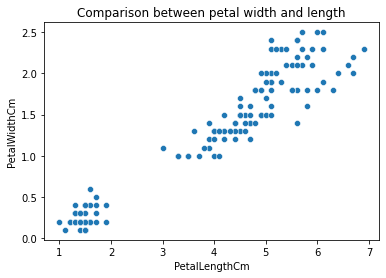

In [40]:
plt.title('Comparison between petal width and length')
sns.scatterplot(Iris_data['PetalLengthCm'], Iris_data['PetalWidthCm'])

We can see two separate clusters, however we know that there are three species. Since we are unsure about which species is represented her, lets bring the species into the equation as well

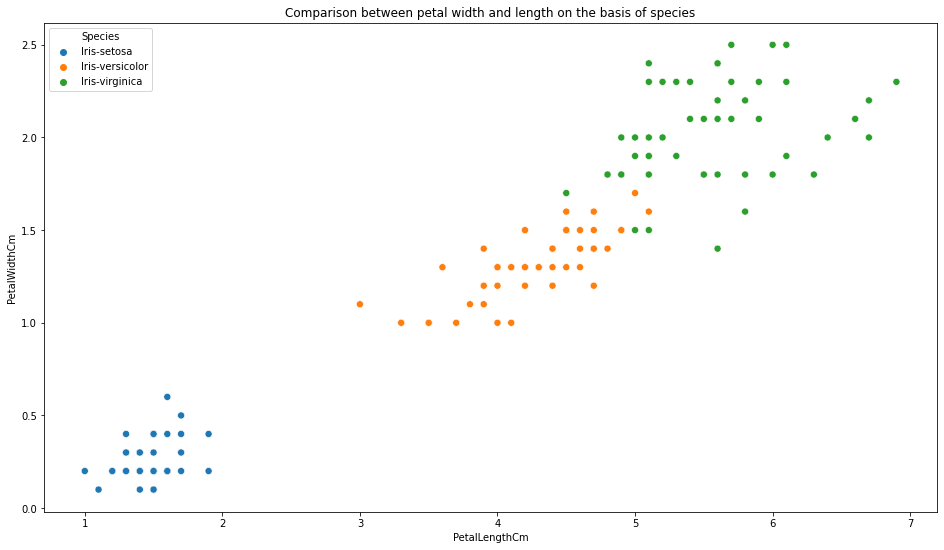

In [41]:
plt.figure(figsize=(16,9))
plt.title('Comparison between petal width and length on the basis of species')
sns.scatterplot(Iris_data['PetalLengthCm'], Iris_data['PetalWidthCm'], hue = Iris_data['Species'], s= 50)

We see that setosa has the smallest petal length as well as petal widths, while Versicolor has average petal length and petal width while the virginica species has the highest petal length as well as petal width.


Now let's visualize all the columns relationship using pair plots.

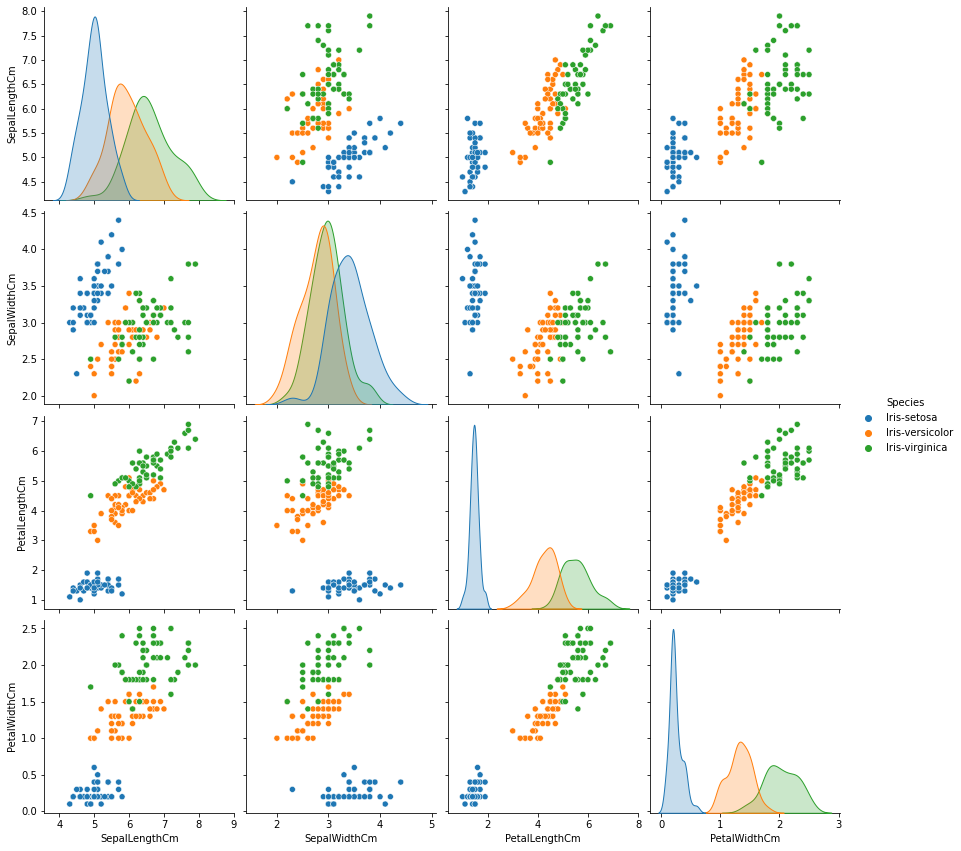

In [43]:
sns.pairplot(Iris_data,hue="Species",height=3)

**Observations**
<br/>
It can be seen that the setosa species has a large difference in its characteristics when compared to the other species, it has smaller petal width and length while its sepal width is high and its sepal length is low. Similar kind of conclusions can be drawn for the other species like the Versicolor species usually have average dimensions whether it is sepal or pedal. While virginica has high pedal width and length while it has small sepal width but large sepal length.

##### **Correlation between variables**

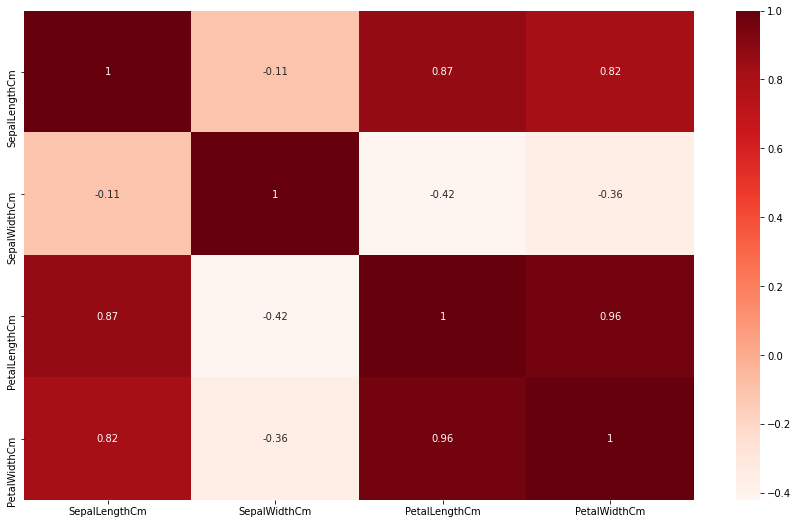

In [49]:
fig = plt.figure(figsize = (15,9))
sns.heatmap(Iris_data.corr(), cmap='Reds', annot = True)

From the above heatmap, we see that petal_length and petal_width have a high correlation, petal_width and sepal_length have good correlation as well as petal_length and sepal_length have good correlations.

#### **Distribution of variables**

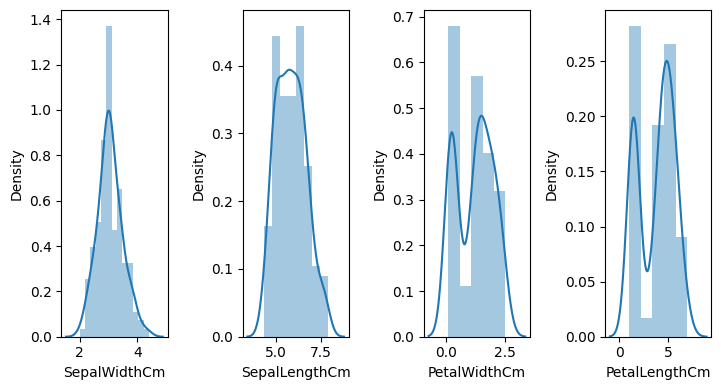

In [50]:
cols = ['SepalWidthCm', 'SepalLengthCm', 'PetalWidthCm', 'PetalLengthCm']
plt.figure(figsize=(20,4), dpi=100)
i = 1
for col in cols:
    plt.subplot(1,11,i)
    sns.distplot(Iris_data[col])
    i = i+1
plt.tight_layout()
plt.show()

We can observe the density distribution of our columns through the above plot. It indicates that they follow a normal distribution.

Let's see the distribution of data for the various columns of our data set.

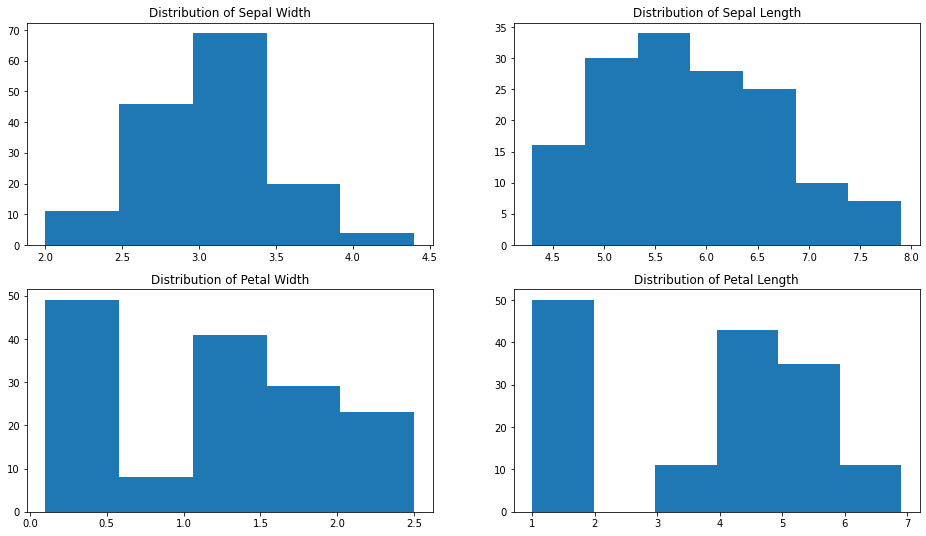

In [53]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
axes[0,0].set_title("Distribution of Sepal Width")
axes[0,0].hist(Iris_data['SepalWidthCm'], bins=5)
axes[0,1].set_title("Distribution of Sepal Length")
axes[0,1].hist(Iris_data['SepalLengthCm'], bins=7)
axes[1,0].set_title("Distribution of Petal Width")
axes[1,0].hist(Iris_data['PetalWidthCm'], bins=5)
axes[1,1].set_title("Distribution of Petal Length")
axes[1,1].hist(Iris_data['PetalLengthCm'], bins=6)
plt.show()


**Observations**
<br/>
- The Highest frequency of sepal width is between 3.0 to 3.5 which is around 70.
- The Highest frequency of sepal length is between 5.5 and 6.0 which is around 35.
- The Highest frequency of petal width is between 0 to 0.5 which is around 50.
- The Highest frequency of petal length is between 1 to 2 which is around 50.

#### Univariate Analysis

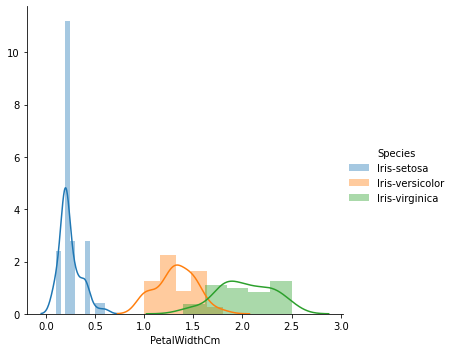

In [54]:
sns.FacetGrid(Iris_data,hue="Species",height=5).map(sns.distplot,"PetalWidthCm").add_legend();

We see the setosa is easily separable while some portions of Versicolor and virginica are mixed.

This was also seen in previous plots whereby Sesota was completely separate whereas Versicolor and Virginica data points were mixed and could almost be seen as one cluster

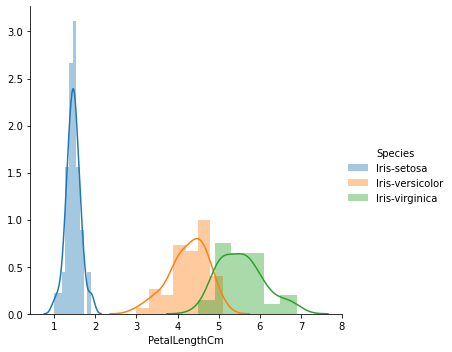

In [55]:
sns.FacetGrid(Iris_data,hue="Species",height=5).map(sns.distplot,"PetalLengthCm").add_legend();

Again we see that on the basis of petal length setosa is separable while the other two are still overlapping.

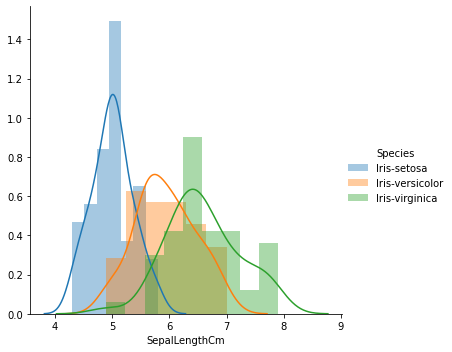

In [57]:
sns.FacetGrid(Iris_data,hue="Species",height=5).map(sns.distplot,"SepalLengthCm").add_legend();

We see it is quite tough to separate the species on the basis of Sepal Length alone.

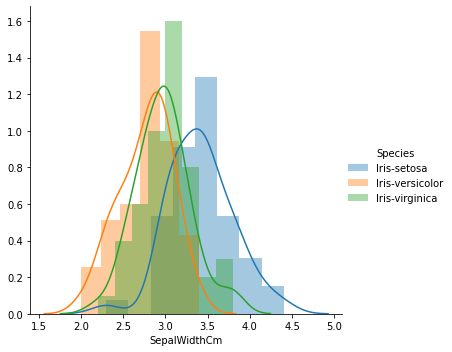

In [58]:
sns.FacetGrid(Iris_data,hue="Species",height=5).map(sns.distplot,"SepalWidthCm").add_legend();

We can see that the overlapping of species intensifies in the case of Sepal Width

**Box and Violin Plots**

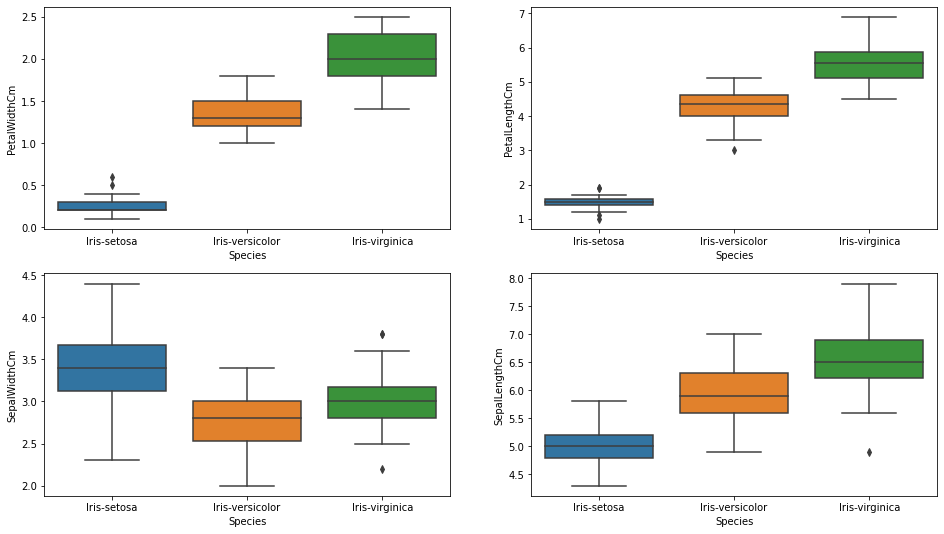

In [59]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot(  y="PetalWidthCm", x= "Species", data=Iris_data,  orient='v' , ax=axes[0, 0])
sns.boxplot(  y="PetalLengthCm", x= "Species", data=Iris_data,  orient='v' , ax=axes[0, 1])
sns.boxplot(  y="SepalWidthCm", x= "Species", data=Iris_data,  orient='v' , ax=axes[1, 0])
sns.boxplot(  y="SepalLengthCm", x= "Species", data=Iris_data,  orient='v' , ax=axes[1, 1])
plt.show()

**Observations**

- We see that Sesota has smaller features in terms of length and width, with fewer outliers.
- Versicolor's features have average lengths and widths.
- Virginica species has the longest features' widths and lengths as compared to others.


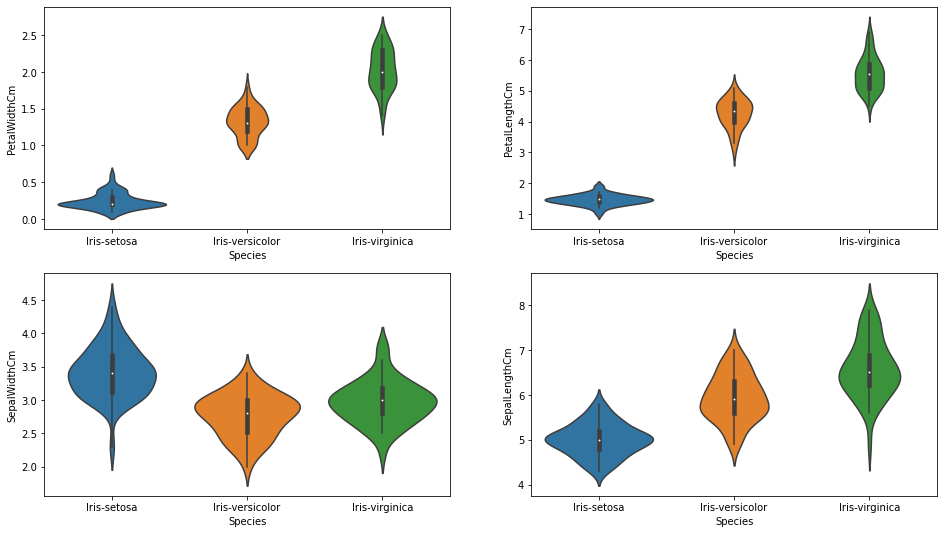

In [61]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.violinplot(y="PetalWidthCm", x= "Species", data=Iris_data,  orient='v' , ax=axes[0, 0])
sns.violinplot(y="PetalLengthCm", x= "Species", data=Iris_data,  orient='v' , ax=axes[0, 1])
sns.violinplot(y="SepalWidthCm", x= "Species", data=Iris_data,  orient='v' , ax=axes[1, 0])
sns.violinplot(y="SepalLengthCm", x= "Species", data=Iris_data,  orient='v' , ax=axes[1, 1])
plt.show()

### Conclusion

1. The dataset is balanced i.e. equal records are present for all three species.
2. We have four numerical columns while just one categorical column which in turn is our target column.
3. A strong correlation is present between petal width and petal length.
4. The setosa species is the most easily distinguishable because of its small feature size.
5. The Versicolor and Virginica species are usually mixed and are sometimes hard to separate, while usually Versicolor has average feature sizes and virginica has larger feature sizes.
